# Dive into matplotlib functions and methods

In [1]:
# initialization
import numpy as np
import matplotlib.pyplot as plt

As we have seen in the introductory examples, the bulk of the work in a matplotlib plot is achieved by calling various methods of the axes object. Here we will dive deeper into the different method calls and their purposes.

## Specifying plot type of data series

### Line plot: the `.plot()` method

We have been using `.plot()` method to visualize data series as a line plot. In typical usage, you supply the x-coordinate vector and y-coordinate vector as positional arguments (and in that order), then add keyword arguments to specify the visual presentation. Some useful keyword arguments are:

+ `label`: the label of the data series, to be used in legend.
+ `color` or `c`: specify the color of the line. For a list of named color, consult [https://matplotlib.org/stable/gallery/color/named_colors.html](https://matplotlib.org/stable/gallery/color/named_colors.html)
+ `linestyle` or `ls`: the style of the line. Possible values include `"-"`, `"--"`, `"-."`, `":"`, and `""`
+ `linewidth` or `lw`: the thickness of the line
+ `marker`: the shape of marker. See [https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html](https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html) for reference
+ `markerfacecolor` or `mfc`: face color of the marker
+ `markeredgecolor` or `mec`: edge color of the marker
+ `markersize` or `mc`: size of the marker

Example:

In [2]:
# define data
x = np.arange(10)
y = np.array([0.74, 0.56, 0.71, 1.16, 0.94, 1.44, 1.31, 1.42, 1.24, 1.41])

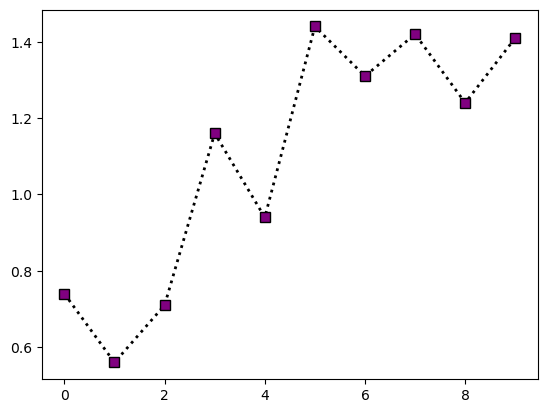

In [3]:
# make plot

fig = plt.figure()
ax = fig.add_subplot()

ax.plot(x, y, c="black", lw=2, ls=":", marker="s", mfc="purple", ms=7)

plt.show(fig)

The official documentations for the `.plot()` method can be found in [https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

### Scatter plot: the `.scatter()` method

To make a scatter plot, use `.scatter()` instead of `.plot()`. Importantly, `.scatter()` allows the marker size (`s`) and marker color (`c`) to vary between data points. In addition to `x`, `y`, `s`, and `c`, some useful arguments for `.scatter()` are:
+ `label`: the label of the data series, to be used in legend
+ `marker`: the shape of marker (see above)
+ `cmap`: the color map used convert the values supplied by `c` to actual color
+ `norm`: the normalization of color scale
+ `vmin`, `vmax`: the endpoints of the color scale

We'll talk more about the color map related arguments (`cmap`, `norm`, `vmin`, `vmax`) in future weeks. For now here is a simple illustration:

In [4]:
# data to plot

x = np.array([
    -0.01,  0.68, -0.95, -2.37, -2.25, -3.35,  0.32, -2.57,  0.66, -1.88, 
    -0.81,  0.33, -3.63,  2.83, -3.14,  2.84,  1.43, -1.41, -1.75, -0.79
])
y = np.array([ 
    0.59, -0.38, -1.59, -0.26,  0.99,  1.92, -1.43, -0.11, -0.74, -0.52, 
    -0.61,  1.03,  0.76,  0.21,  0.29,  0.03,  0.2 ,  0.32, -0.17,  0.97
])

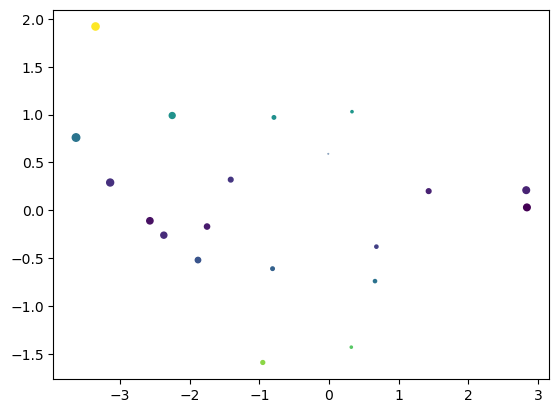

In [5]:
# make plot

fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(x, y, s = 8 * np.fabs(x), c = np.fabs(y))

plt.show(fig)

The official documentations for the `.scatter()` method can be found in [https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html) 

### Error bars: the `.errorbar()` method

To plot errorbars, use the `.errorbar()` method. The main arguments are the x-coordinate `x`, the y-coordinates `y`, and the y error range `yerr` (there's also an `xerr` in case you need to plot horizontal error bars). Additional useful arguments include:

+ `label`: the label of the data series, to be used in legend
+ `ecolor`: color of the errorbar lines
+ `elinewidth`: linewidth of the errorbar lines
+ `capsize`: length of the error bar caps

Note that there are multiple ways to specify `yerr`. To illustrate, below are average normal temperature, standard deviations in normal temperature, normal high temperature, and normal low temperature (in °F) at Portege Bay, measured from 1981 through 2010:

In [6]:
# data to plot

months = list(range(1, 13))
normal_avg = np.array([
    43.0, 44.3, 47.6, 51.4, 57.3, 62.0,
    66.2, 66.6, 61.9, 53.7, 46.5, 41.4
])
normal_std = np.array([
    2.3, 2.5, 2.2, 1.7, 1.8, 1.6, 
    1.8, 1.4, 1.6, 1.3, 2.7, 2.0
])
normal_Tmax = np.array([
    48.6, 51.4, 55.4, 59.9, 65.8, 70.7,
    75.8, 76.2, 70.8, 60.7, 52.4, 46.9
])
normal_Tmin = np.array([
    37.3, 37.1, 39.7, 42.9, 48.8, 53.3,
    56.5, 57.0, 53.1, 46.8, 40.6, 36.0
])

Suppose we want to plot the average normal temperature and show its standard deviations as errorbar, we may do:

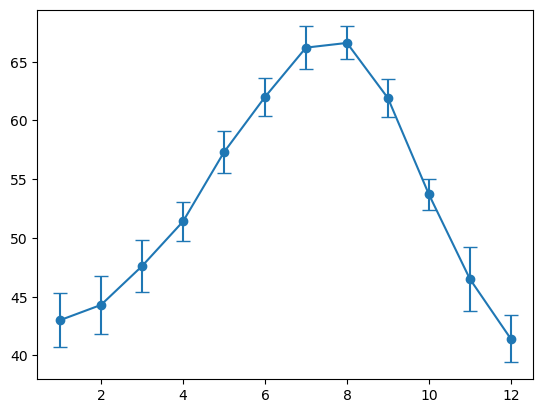

In [7]:
# make plot

fig = plt.figure()
ax = fig.add_subplot()

ax.errorbar(months, normal_avg, yerr=normal_std, capsize=5, marker="o")

plt.show(fig)

Suppose we want to use errorbars to instead indicate the normal high and low temperature. Then we first has to construct the error bar intervals as a 2-by-12 array:

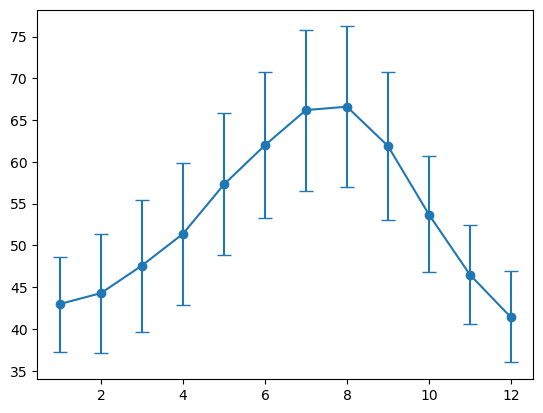

In [8]:
# construct the asymmetric error intervals

temp_yerr = np.zeros((2, 12))
temp_yerr[0, :] = normal_avg - normal_Tmin
temp_yerr[1, :] = normal_Tmax - normal_avg

# make plot

fig = plt.figure()
ax = fig.add_subplot()

ax.errorbar(months, normal_avg, yerr=temp_yerr, capsize=5, marker="o")

plt.show(fig)

The official documentations for the `.errorbar()` method can be found in [https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) 

### Bar graph: the `.bar()` method

To make a bar graph, use the `.bar()` method. The main arguments are the x-coordinate `x` and the height `height` of the bar height. In addition, you can optionally supply `width` and `bottom`, both of which can be scalar or vector. Additional useful arguments include:

+ `label`: the label of the data series, to be used in legend
+ `color`: color of the bar faces. Can be a scalar or a vector
+ `tick_label`: tick labels for each bar.

Example:

In [9]:
# data to plot

labels = ["apple", "banana", "melon", "orange"]
counts = np.array([12, 20, 5, 15])

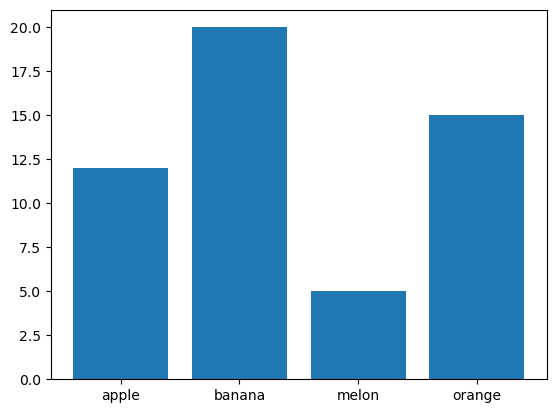

In [10]:
# make plot

fig = plt.figure()
ax = fig.add_subplot()

ax.bar(np.arange(len(labels)), counts, tick_label=labels)

plt.show(fig)

The official documentations for the `.bar()` method can be found in [https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html)

### Histogram: the `.hist()` method

Histogram is a common tool to visualize a sample measured on a continuous scale. In matplotlib, a histogram can be produced using the `.hist()` method. Note that the precise shape of a histogram (and the impression it gives people) is dependent on the bin length and bin boundaries. These can be customized using the `bins` and `range` arguments. Additional useful argument includes:

+ `label`: the label of the data series, to be used in legend
+ `color`: color of the bar faces. Can be a scalar or a vector

As an example, recall the height distribution from week 4:

In [11]:
# data to plot

heights = np.array([
    177, 169, 182, 173, 171, 179, 179, 171, 175, 163, 
    180, 179, 179, 164, 173, 175, 177, 176, 181, 167, 
    173, 171, 175, 177, 181, 172, 178, 165, 174, 180, 
    173, 176, 180, 180, 179, 174, 175, 173, 179, 186, 
    175, 172, 175, 164, 176, 170, 174, 175, 178, 176
])

We can construct a histogram like so:

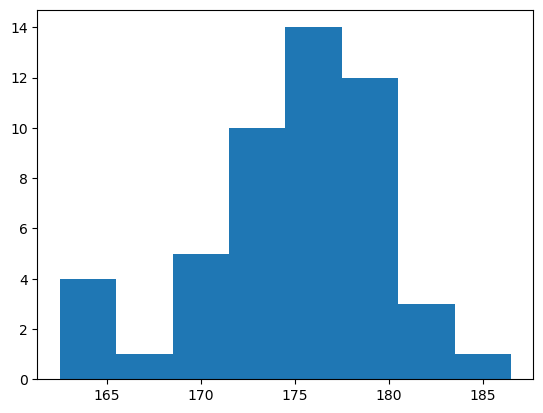

In [12]:
# make plot

bins = np.arange(np.min(heights) - 0.5, np.max(heights) + 2.5, 3)

fig = plt.figure()
ax = fig.add_subplot()

ax.hist(heights, bins=bins)

plt.show(fig)

The official documentations for the `.hist()` method can be found in [https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) 

### Annotations: the `.axhline()`, `.axvline()`, and `.text()` methods

Sometimes you want to include auxillary guide lines and texts in your plot. For guide lines, the `.axhline()` method can be used to produce horizontal line while the `.axvline()` method can be used to create vertical line. The `.axhline()` method has a position argument specifying the $y$ coordinate of the horizontal line. Similarly, `.axvline()` has a positional argument specifying the $x$ coordinate of the vertical line. In addition, the `ls`, `lw`, and `c` keyword arguments can be used to specify line style, line width, and color, respectively.

As an example, suppose we want to add a vertical line that indicates the average height to the histogram from the previous section. In such case, we may do:

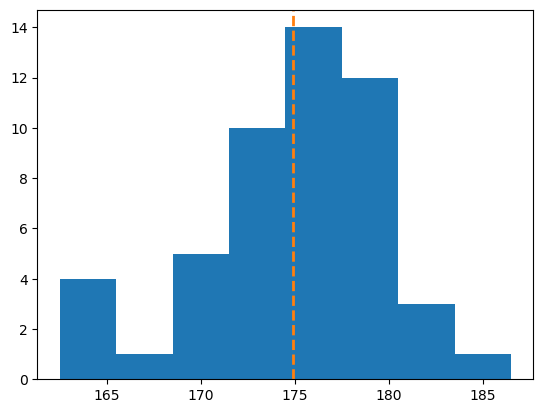

In [13]:
bins = np.arange(np.min(heights) - 0.5, np.max(heights) + 2.5, 3)

fig = plt.figure()
ax = fig.add_subplot()

ax.hist(heights, bins=bins)

# NEW: adding vertical line
ax.axvline(np.mean(heights), c="tab:orange", ls="--", lw=2)

plt.show(fig)

In addition, we can also place texts in the plot area using the `.text()` method. The `.text()` method has 3 mandatory arguments, which are the x-coordinate and y-coordinate of the texts, and the string to be used (in that order). In addition, the `c` and `fontsize` keyword arguments can be used to set the color and font-size of the text, respectively.

For example, suppose we want want to print out the mean height in the above histogram, we may do:

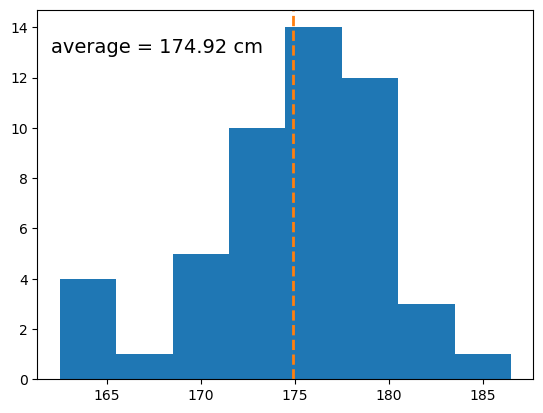

In [14]:
bins = np.arange(np.min(heights) - 0.5, np.max(heights) + 2.5, 3)
avg_h = np.mean(heights)

fig = plt.figure()
ax = fig.add_subplot()

ax.hist(heights, bins=bins)
ax.axvline(avg_h, c="tab:orange", ls="--", lw=2)

# NEW: adding text
ax.text(162, 13, "average = " + str(round(avg_h, 2)) + " cm", fontsize=14)

plt.show(fig)

## Title, legends, and axes labels

### Set title: the `.set_title()` method

The title of a plot can be set using the `.set_title()` method of the axes object. In addition to the title text, some useful arguments are:
+ `loc`: the horizontal alignment of the title. Can be `"center"`, `"left"`, or `"right"` (the default is `"center"`)
+ `fontsize`: the font size of the title
+ `fontstyle`: the "style" of the font, can be `"normal"`, `"italic"`, or `"oblique"` (default is `"normal"`)
+ `fontweight`: the "weight" of the font, can be `"light"`, `"normal"`, `"bold"`, or `"extra bold"` (among other possibilities). Default is `"normal"`
+ `color`: the color of the title text

Example:

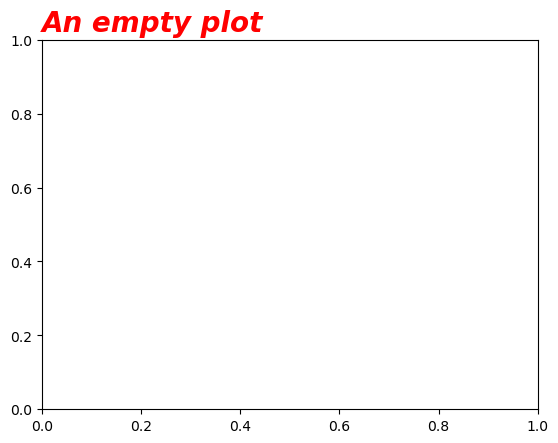

In [15]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title("An empty plot", loc="left", fontsize=20, fontstyle="oblique", fontweight="bold", color="red")

plt.show(fig)

For full documentation, see [https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html)

### Set axes labels: the `.set_xlabel()` and `.set_ylabel()` methods

These methods are used to set the x-axis and y-axis labels. Their arguments are very similar to that of `.set_title()`. However, the possibility for `loc` are `"center"`, `"top"`, and `"bottom"` for the case of `.set_ylabel()`

Example:

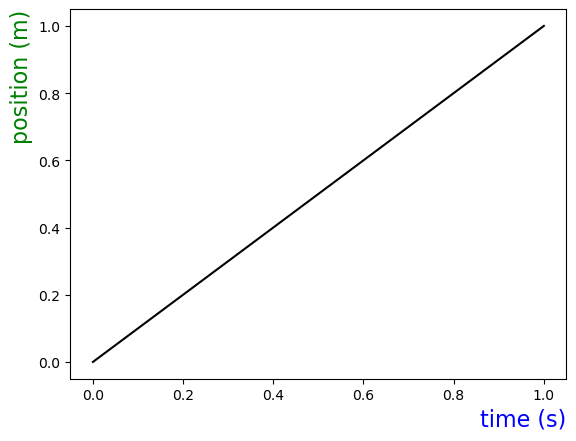

In [16]:
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(np.array([0, 1]), np.array([0, 1]), c="k")

ax.set_xlabel("time (s)", loc="right", fontsize=16, color="blue")
ax.set_ylabel("position (m)", loc="top", fontsize=16, color="green")

plt.show(fig)

For full documentation, see [https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html) (for x-axis) and [https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html) (for y-axis)

### Legends

Legends are created using the `.legend()` method. Some useful arguments to `.legend()` are:
+ `loc`: the location of the legend, can be `"upper left"`, `"upper right"`, `"lower left"`, `"lower right"`, `"upper center"`, `"lower center"`, `"center left"`, `"center right"`, `"center"`, or `"best"`. The default is `"best"`
+ `fontsize`: The font size of the legend
+ `title`: The title of the legend (default to `None`)
+ `title_fontsize`: the font size of the title

Example:

In [17]:
# data to plot

x = np.linspace(0, 1, 51)
y1 = x
y2 = x**2
y3 = np.sqrt(x)

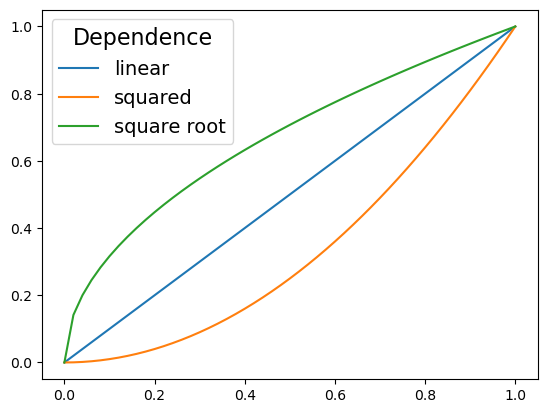

In [18]:
# make the plot

fig = plt.figure()
ax = fig.add_subplot()

ax.plot(x, y1, label="linear")
ax.plot(x, y2, label="squared")
ax.plot(x, y3, label="square root")

ax.legend(loc="upper left", title="Dependence", title_fontsize=16, fontsize=14)

plt.show(fig)

For full documentation, see [https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html)

### Remarks: unicode characters

In scientific figures, titles, legends, and axes labels often include special character such as `°`, superscript, or subscript. One way to deal with such needs is to use unicode characters, which include many of these special symbols. 

Two useful online resources for unicode characters are the BabelMap Online character map [https://www.babelstone.co.uk/Unicode/babelmap.html](https://www.babelstone.co.uk/Unicode/babelmap.html) and Shapecatcher [https://shapecatcher.com/](https://shapecatcher.com/). The former allows you to find unicode characters by their location within the unicode specification, while the latter makes it possible to translate hand-drawn characters to unicode ones.

Here is a small collection of unicode characters that you may find useful (you should be able to just copy-and-paste them as you need):

+ Superscript: `¹` `²` `³` `⁰` `⁺` `⁻` (more can be found in the "Superscripts and Subscripts" unicode block)
+ Subscript: `₀` `₁` `₂` `₃` `ᵢ` (again, more are in the "Superscripts and Subscripts" unicode block)
+ Arithmetic operators: `+` `−` `×` `÷` `±` `∓`
+ Comparison operators: `∼` `≈` `≃` `≅` `≡` `≠` `≥` `≤` (more can be found in the "Mathematical Operators" unicode block)
+ Miscellaneous mathematical symbols: `•` `°` `∞` `…` `⋮` `⋯`
+ Arrows: `→` `←` `↔` `⇒` `⇔` `↘` `↗` (more in the "arrows" unicode block)

Some additional useful unicode blocks:
+ "Latin-1 supplement" for basic symbols
+ "Greek and Coptic" for greek letters

## Axes scales and ticks; Grids

### Setting axes limits via `.set_xlim()` and `.set_ylim()`

The limits of the horizontal ("x") and vertical ("y") axes can be set using the `.set_xlim()` and `.set_ylim()` methods. Both of these take a pair of scalar values. Note that to invert the axis, all you have to do is to supply the numbers in reverse order.

Example:

In [19]:
# data to plot

time =  [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
depth = [0.0, 0.4, 0.9, 1.2, 1.4, 1.5, 1.3, 0.9, 0.5, 0.2, 0.0]

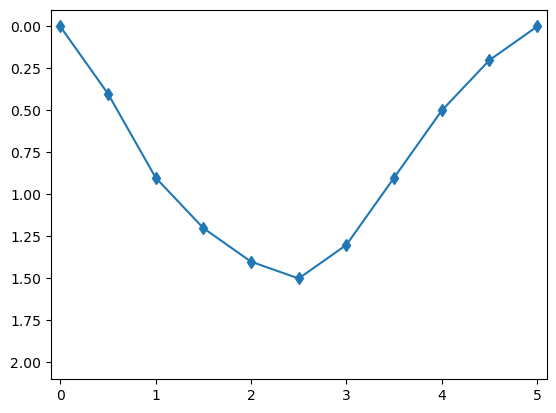

In [20]:
# make the plot

fig = plt.figure()
ax = fig.add_subplot()

ax.plot(time, depth, marker="d")

ax.set_xlim(-0.1, 5.1)
ax.set_ylim(2.1, -0.1)

plt.show(fig)

For full documentation, see [https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlim.html](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlim.html) (for x-axis) and [https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylim.html](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_ylim.html) (for y-axis)

### Setting ticks via `.set_xticks()`, `.set_yticks()`, and `.tick_params()`

We can set the locations of ticks using `.set_xticks()` and `.set_yticks()`. These accept a 1D numpy array of tick locations as their first argument. In addition, they also have a `labels` argument that can be used to customize the tick labels.

Unfortunately, neither `.set_xticks()` nor `.set_yticks()` provides a way to change the font size of the tick labels. To do so, we need to set the `labelsize` argument of the `.tick_params()` method.

Example:

In [21]:
# data to plot
angle = np.linspace(0, 2 * np.pi, 51)
projection = np.sin(angle)

# create labels
labels = [0]
for x in np.arange(0.25, 2.1, 0.25):
    labels.append(str(x) + "π")

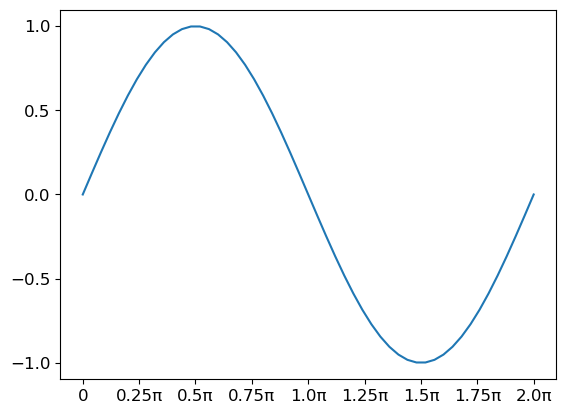

In [22]:
# making plot

fig = plt.figure()
ax = fig.add_subplot()

ax.plot(angle, projection)

ax.set_xticks(np.arange(0, 2.1 * np.pi, 0.25 * np.pi), labels)
ax.set_yticks(np.arange(-1, 1.1, 0.5))

ax.tick_params(labelsize=12)

plt.show(fig)

For full documentation, see [https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticks.html](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticks.html) (for x-axis ticks) and [https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_yticks.html](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_yticks.html) (for y-axis ticks)

### Axes grid via `.grid()`

To add a grid to the plot, use the `.grid()` method. Some useful arguments:
+ `axis`: which axis (axes) to draw the grid. Can be `"x"`, `"y"`, or `"both"` (default is `"both"`)
+ `color` or `c`: the color of the grid lines
+ `linewidth` or `lw`: line width of the grid
+ `linestyle` or `ls`: line style of the grid

Example:

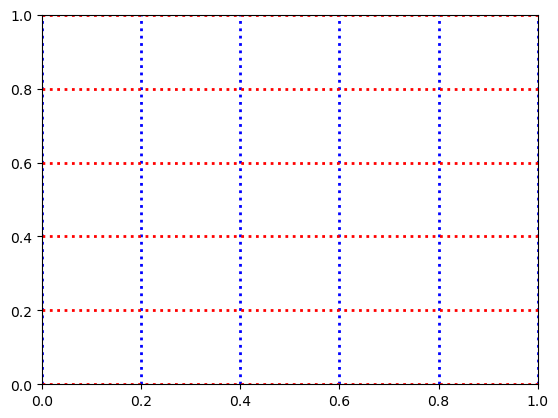

In [23]:
fig = plt.figure()
ax = fig.add_subplot()

ax.grid(axis="x", color="blue", ls=":", lw=2)
ax.grid(axis="y", color="red", ls=":", lw=2)

plt.show(fig)

For full documentation, see [https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.grid.html](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.grid.html)

## Remark: customizing figure size

The figure size is a property of the figure and not of the axes. So, to adjust the figure size we need to customize the figure object. In particular, we can adjust the figure size using the `figsize` argument in the `plt.figure()` call. Example:

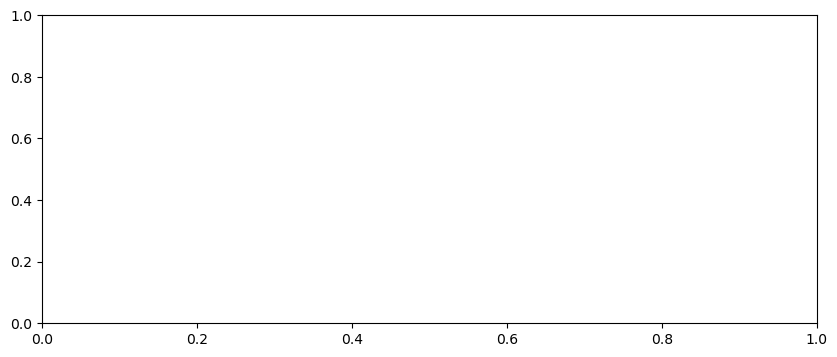

In [24]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot()

plt.show(fig)